In [1]:
from sklearn.datasets import make_circles, make_moons
import matplotlib.pyplot as plt
%matplotlib inline
import os, sys
import numpy as np
sys.path.append(os.path.abspath("../src"))

In [2]:
from keras.datasets import mnist

Using TensorFlow backend.


In [3]:
from cgan import CGAN
%load_ext autoreload
%autoreload 2

In [4]:
from keras.models import Sequential, Model, Input
from keras.layers import (
    Conv2D, Conv2DTranspose, LeakyReLU, Flatten, 
    Dense, Reshape, Dropout, MaxPool2D, BatchNormalization,
    Concatenate
)

In [5]:
def create_discriminator(input_dim, condition_dim):
    input_img = Input(shape=input_dim)
    input_cond = Input(shape=(condition_dim,))
    cond = Dense(32)(input_cond)
    cond = LeakyReLU()(cond)
    
    h = Conv2D(16, (3,3), padding="same")(input_img)
    h = LeakyReLU()(h)
    h = Conv2D(16, (3,3), padding="same")(h)
    h = LeakyReLU()(h)
    h = MaxPool2D(2)(h)
    h = Conv2D(16, (3,3), padding="same")(h)
    h = LeakyReLU()(h)
    h = MaxPool2D(2)(h)
    h = Conv2D(8, (3,3), padding="same")(h)
    h = LeakyReLU()(h)
    h = Flatten()(h)
    h = Concatenate()([h, cond])
    h = Dense(20)(h)
    h = LeakyReLU()(h)
    output = Dense(1, activation="sigmoid")(h)
    return Model([input_cond, input_img], output)

def create_generator(noise_dim, condition_dim):
    input_noise = Input(shape=(noise_dim,))
    input_cond = Input(shape=(condition_dim,))
    h = Concatenate()([input_noise, input_cond])
    
    model = Sequential([
        Dense(256, input_shape=(noise_dim+condition_dim,)),
        LeakyReLU(),
        Reshape((8, 8, 4)),
        Conv2DTranspose(16, (3, 3), strides=2, padding="same"),
        LeakyReLU(),
        Conv2D(32, (3, 3), padding="same"),
        LeakyReLU(),
        Conv2D(32, (3, 3), padding="same"),
        LeakyReLU(),
        Conv2DTranspose(32, (3, 3), strides=2, padding="same"),
        LeakyReLU(),
        Conv2D(32, (3, 3), padding="same"),
        LeakyReLU(),
        Conv2D(32, (3, 3), padding="same"),
        LeakyReLU(),
        Conv2D(1, (5, 5), padding="valid", activation="tanh")
    ])
    output = model(h)
    return Model([input_cond, input_noise], output)

In [6]:
noise_size = 64
model = CGAN(noise_dim=noise_size,
            input_dim=(28, 28, 1),
             condition_dim=10,
            create_discriminator_func=create_discriminator,
            create_generator_func=create_generator)

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            (None, 64)           0                                            
__________________________________________________________________________________________________
input_4 (InputLayer)            (None, 10)           0                                            
__________________________________________________________________________________________________
concatenate_2 (Concatenate)     (None, 74)           0           input_3[0][0]                    
                                                                 input_4[0][0]                    
__________________________________________________________________________________________________
sequential_1 (Sequential)       (None, 28, 28, 1)    62225       concatenate_2[0][0]              
Total para

/usr/local/lib/python3.5/dist-packages/keras/engine/training.py:479: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


In [7]:
data = mnist.load_data()
train, test = data
X, y = train
# X = X[y==7]
X = X.astype(np.float32) / 128 - 1
X = np.expand_dims(X, 3)

In [8]:
from keras.utils import to_categorical

In [9]:
cond = to_categorical(y, 10)

In [10]:
predictions = []
noise = np.random.normal(0, 1, (100, noise_size))
test_cond = to_categorical(np.arange(100) % 10)

0


/usr/local/lib/python3.5/dist-packages/keras/engine/training.py:479: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


0.8523865,0.64047074, 0.0,0.6512336


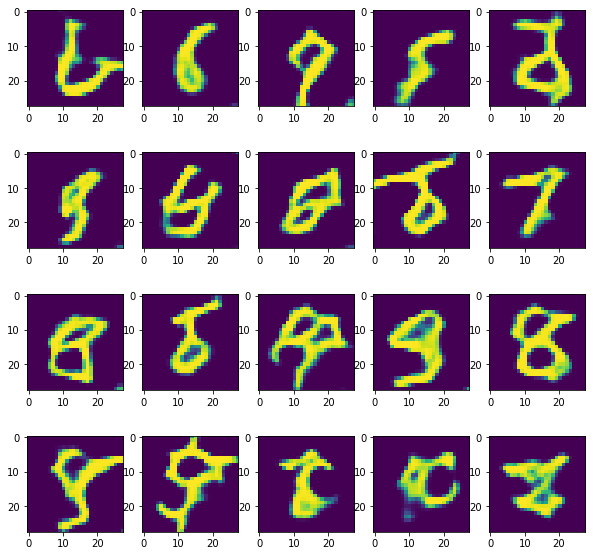

1
0.8591102,0.63711536, 0.0,0.65087473


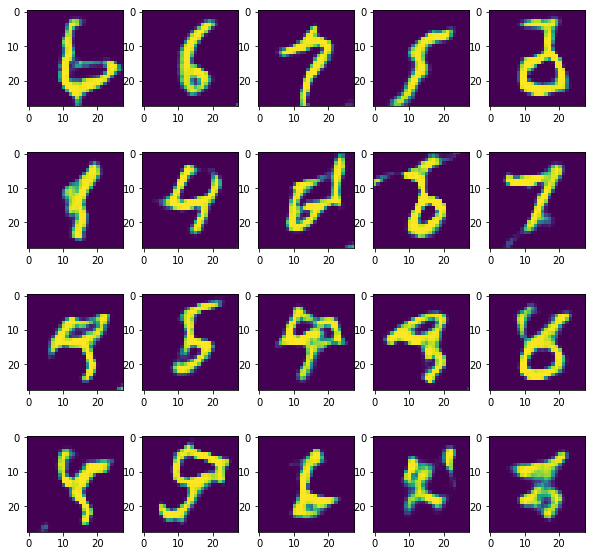

2
0.8796481,0.6229693, 0.0,0.66542304


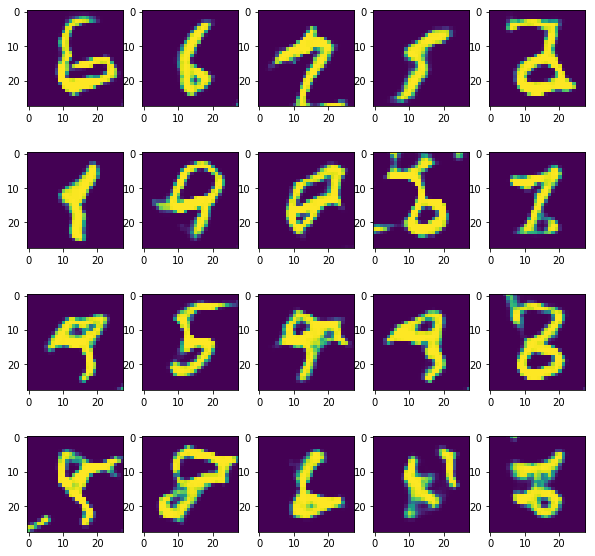

3
0.934715,0.58747774, 0.0,0.7049362


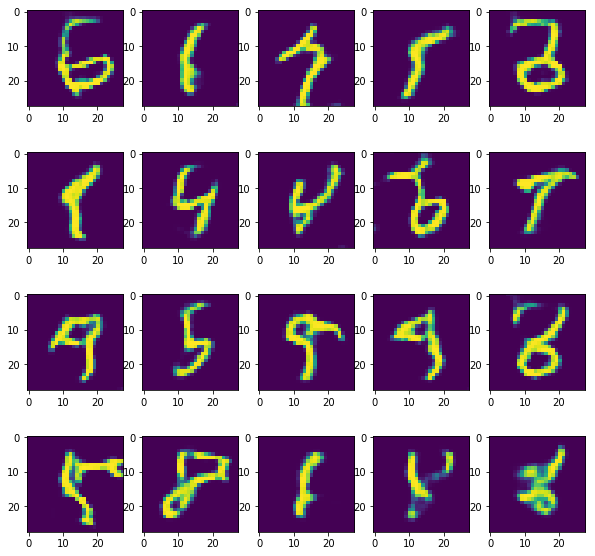

4
0.94876516,0.5844221, 0.0,0.70542866


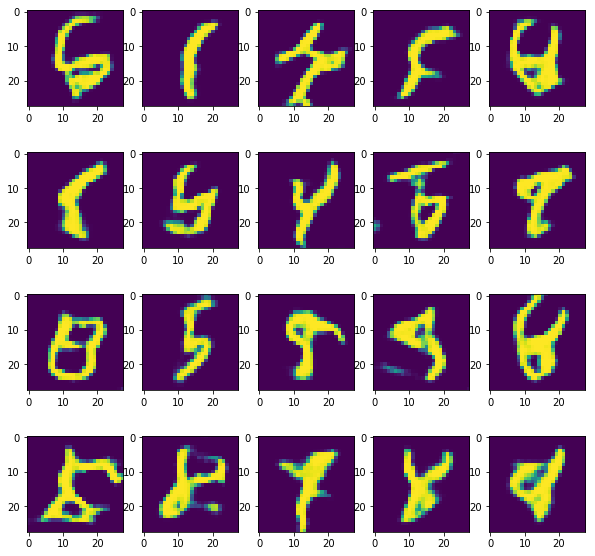

5
0.92592704,0.6080925, 0.0,0.67547244


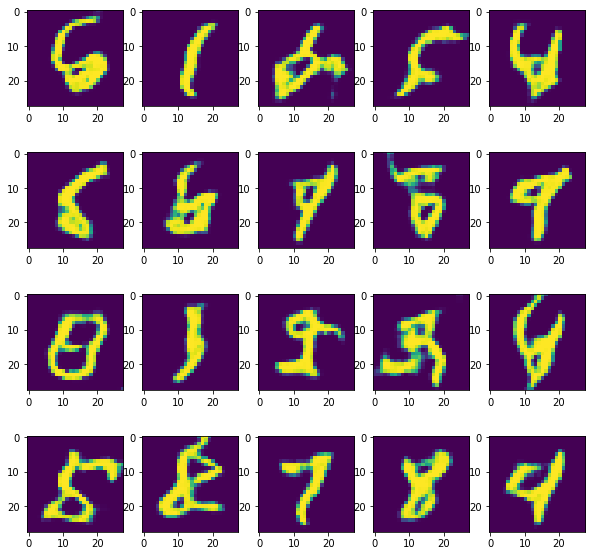

6
0.87878805,0.6246969, 0.0,0.65357906


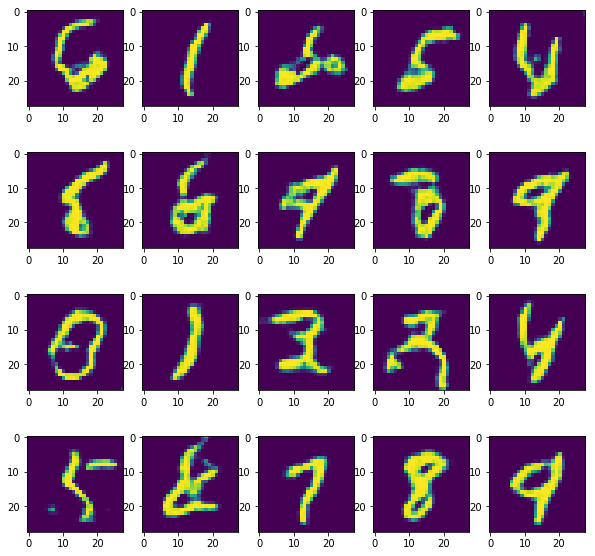

7
0.840573,0.6368115, 0.0,0.63898903


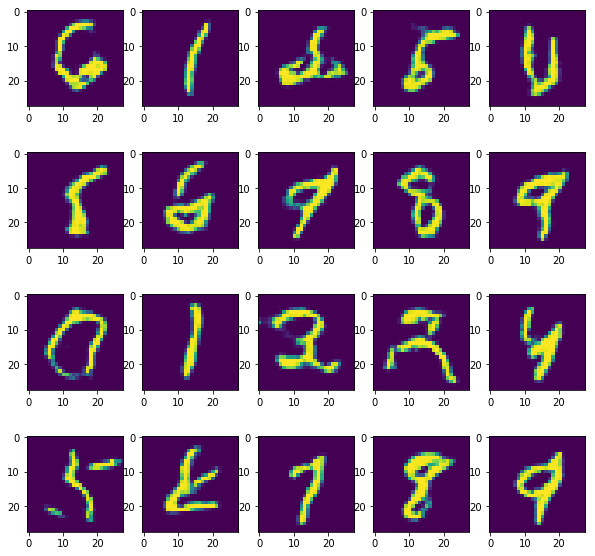

8
0.804456,0.6529348, 0.0,0.61422443


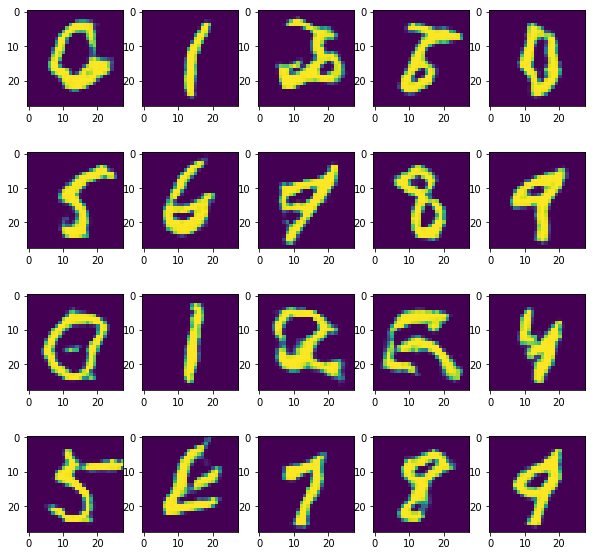

9
0.77392685,0.66562307, 0.0,0.5945429


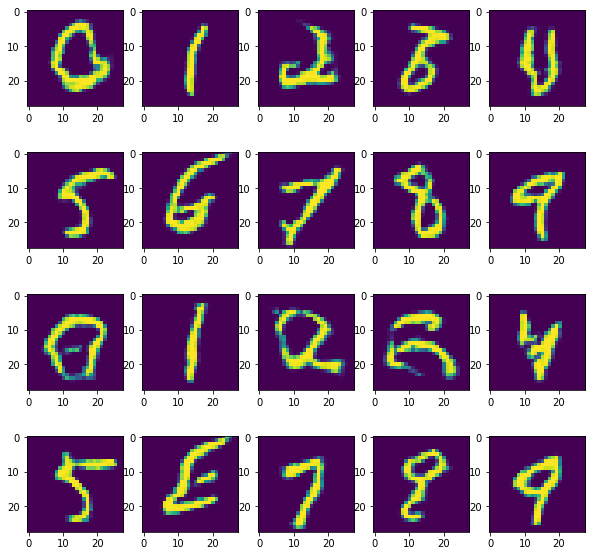

10
0.7652869,0.6690661, 0.0,0.5856537


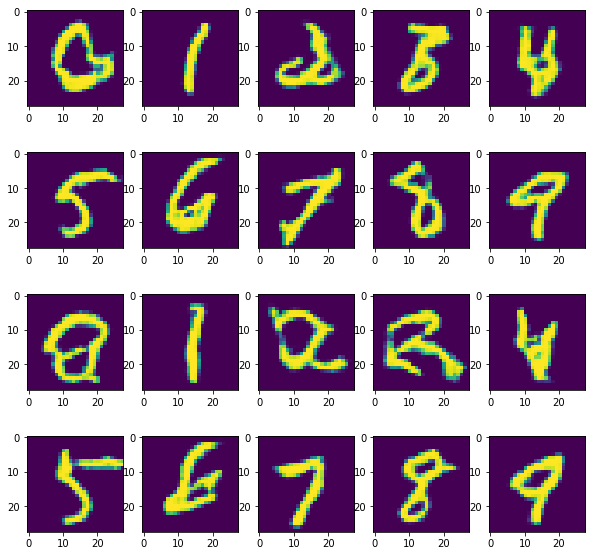

11
0.7555131,0.6707555, 0.0,0.58079594


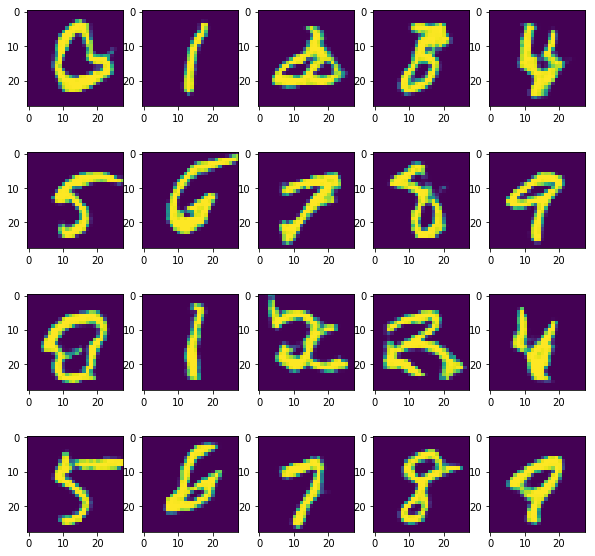

12
0.74829096,0.67239547, 0.0,0.5787009


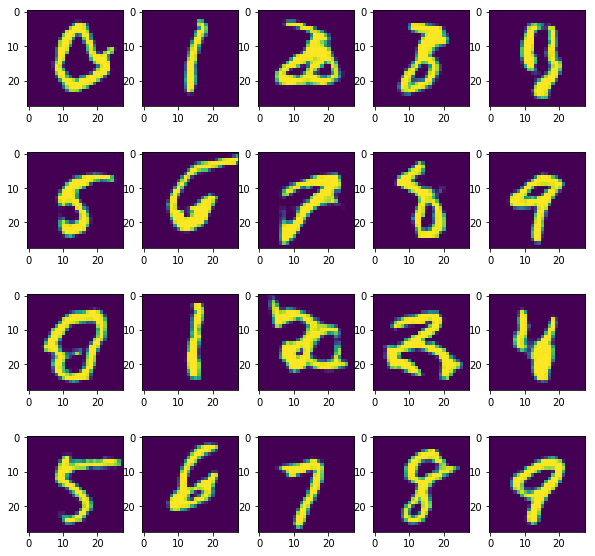

13
0.7388586,0.6768259, 0.0,0.56876004


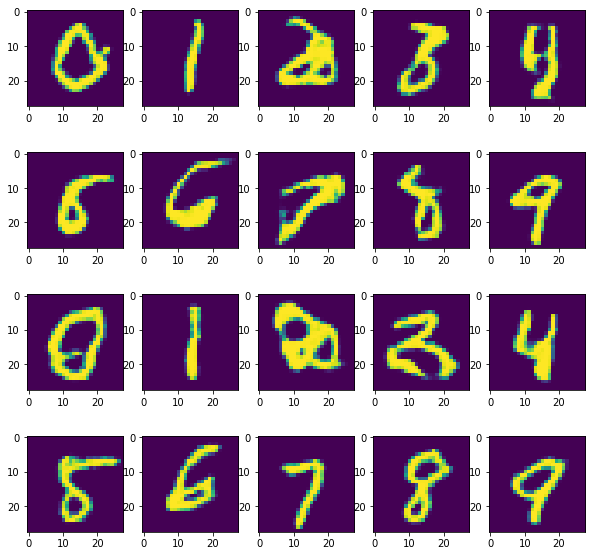

14
0.73225105,0.67803895, 0.0,0.56431955


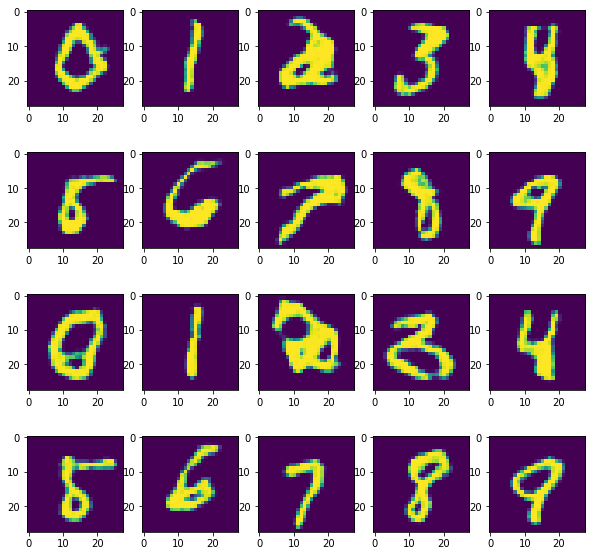

15
0.73636657,0.67689496, 0.0,0.56667334


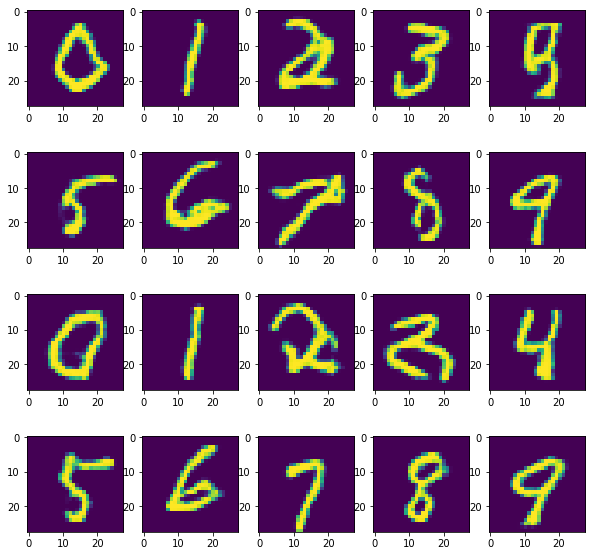

16
0.73914045,0.6780369, 0.0,0.56216615


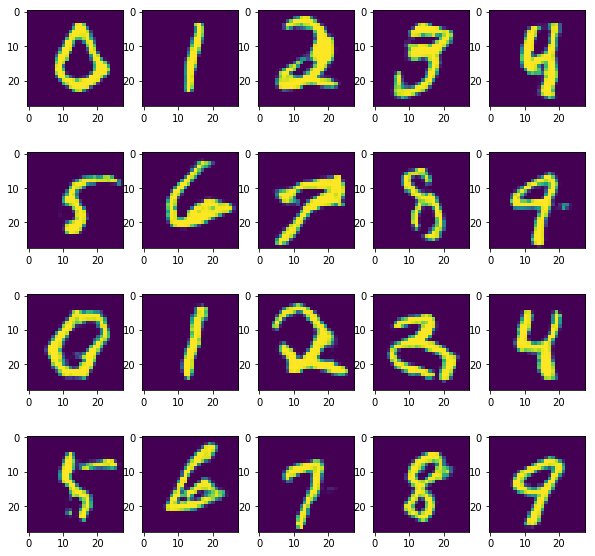

17
0.7357608,0.6785748, 0.0,0.5629257


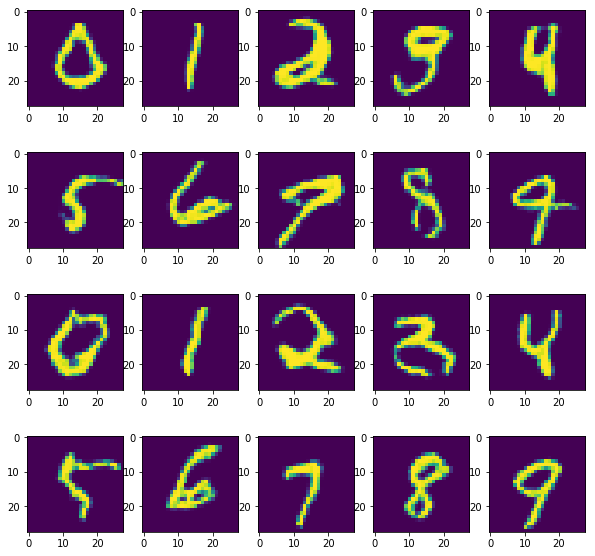

18
0.73666793,0.6783976, 0.0,0.5632929


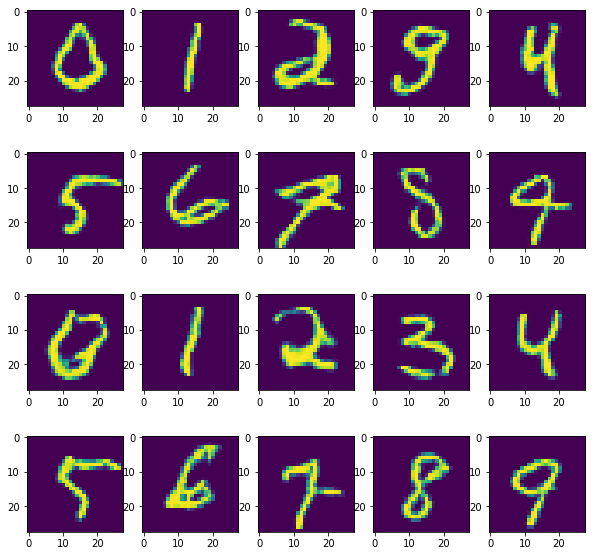

19
0.73489016,0.68101656, 0.0,0.55678254


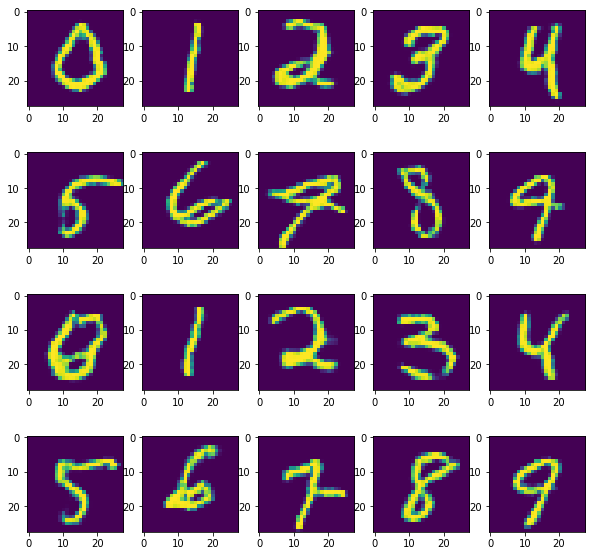

20
0.7323066,0.68281907, 0.0,0.549187


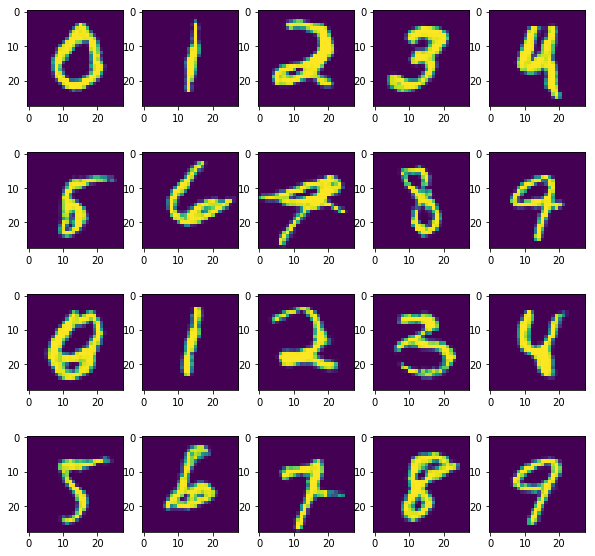

21
0.72818965,0.6849552, 0.0,0.5442291


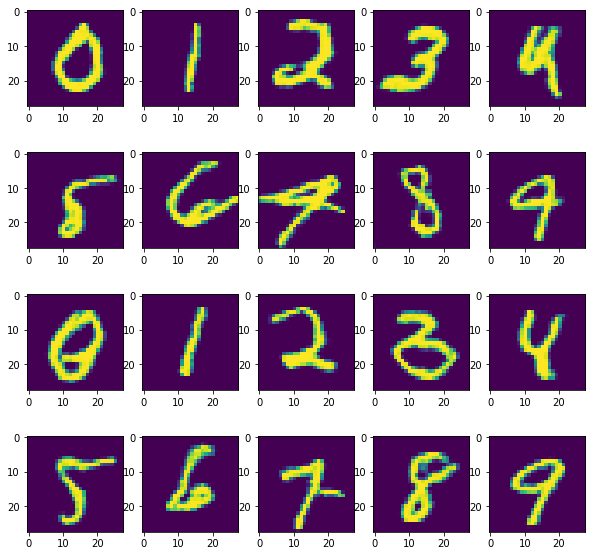

22
0.72694343,0.68622863, 0.0,0.54115754


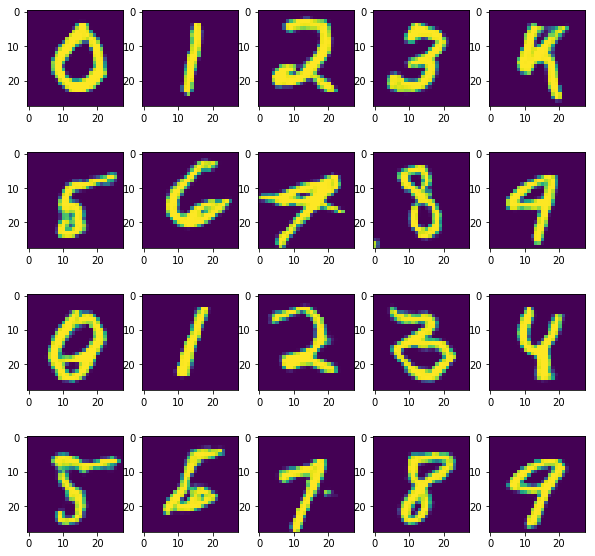

23
0.7257516,0.68639874, 0.0,0.54117423


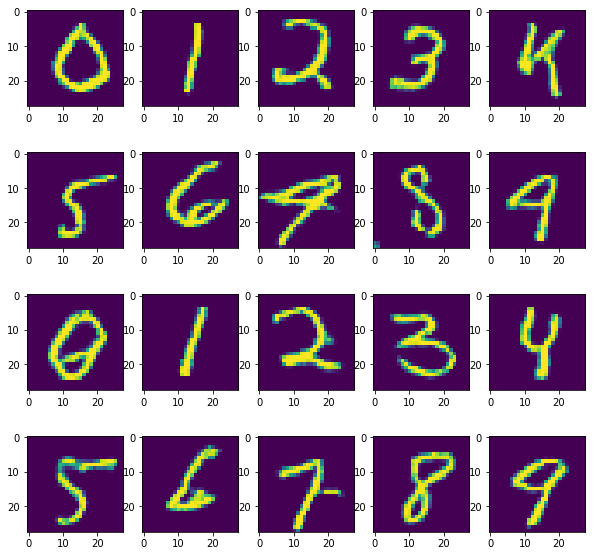

24


In [ ]:
for i in range(50):
    print(i)
    model.train(X, cond, 1, 512)
    pred = model.generator.predict([test_cond, noise])
    predictions.append(pred)
    plt.figure(figsize=(10, 10))
    for j in range(20):
        plt.subplot(4, 5, j+1)
        plt.imshow(pred[j,:,:,0])
    plt.show()

In [ ]:
model.discriminator.save("cgan_mnist_discriminator.h5")
model.generator.save("cgan_mnist_generator.h5")

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation, rc
from IPython.display import HTML

fig, axes = plt.subplots(10, 10)
fig.set_figheight(12)
fig.set_figwidth(12)
axes = axes.ravel()
ims =  [ ax.imshow(predictions[0][i,:,:,0], 
                   vmin=-1, vmax=1, cmap="gray_r",
                   animated=True)
         for i, ax in enumerate(axes)
       ]
for ax in axes:
    ax.axis("off")


def animate(i):
    for j, im in enumerate(ims):
        im.set_array(predictions[i][j,:,:,0])
    return ims


# call the animator. blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, frames=len(predictions), interval=100, blit=True)
plt.close(fig)

In [ ]:
anim.save("cgan_numbers.mp4")

In [ ]:
HTML(anim.to_html5_video())